In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [16]:
# Cargar todos los resultados del algoritmo genético

# Especificar el directorio donde están los resultados
task_id = 'task_1808222'  # Cambia este ID según tu experimento
resultados_dir = f'resultados/{task_id}'

# Lista para almacenar todos los DataFrames
todos_los_datos = []

# Verificar si el directorio existe
if os.path.exists(resultados_dir):
    # Obtener todos los archivos CSV en el directorio
    archivos_csv = [f for f in os.listdir(resultados_dir) if f.endswith('.csv')]
    archivos_csv.sort()  # Ordenar para procesar en orden
    
    print(f"Archivos encontrados en {resultados_dir}:")
    for archivo in archivos_csv:
        print(f"  - {archivo}")
    
    # Cargar cada archivo CSV
    for archivo in archivos_csv:
        ruta_archivo = os.path.join(resultados_dir, archivo)
        try:
            df_temp = pd.read_csv(ruta_archivo)
            
            # Extraer número de generación del nombre del archivo
            if 'generacion' in archivo:
                generacion = int(archivo.split('_')[-1].split('.')[0])
                df_temp['generacion'] = generacion
            else:
                df_temp['generacion'] = 0  # Para archivos sin número de generación
            
            todos_los_datos.append(df_temp)
            print(f"✓ Cargado: {archivo} ({len(df_temp)} individuos)")
            
        except Exception as e:
            print(f"✗ Error al cargar {archivo}: {e}")
    
    # Concatenar todos los DataFrames
    if todos_los_datos:
        datos_completos = pd.concat(todos_los_datos, ignore_index=True)
        print(f"\n📊 Dataset consolidado:")
        print(f"   - Total de individuos: {len(datos_completos)}")
        print(f"   - Generaciones: {datos_completos['generacion'].min()} a {datos_completos['generacion'].max()}")
        print(f"   - Columnas: {list(datos_completos.columns)}")
        
        # Mostrar estadísticas básicas
        print(f"\n📈 Mejor fitness por generación:")
        mejor_por_gen = datos_completos.groupby('generacion')['fitness'].min()
        for gen, fitness in mejor_por_gen.items():
            print(f"   Generación {gen}: {fitness:.6f}")
    else:
        print("⚠️ No se pudieron cargar datos")
        
else:
    print(f"❌ El directorio {resultados_dir} no existe")
    print("Directorios disponibles en 'resultados/':")
    if os.path.exists('resultados'):
        subdirs = [d for d in os.listdir('resultados') if os.path.isdir(os.path.join('resultados', d))]
        for subdir in subdirs:
            print(f"  - {subdir}")
    else:
        print("  El directorio 'resultados' no existe")

Archivos encontrados en resultados/task_1808222:
  - resultados_generacion_1.csv
  - resultados_generacion_10.csv
  - resultados_generacion_11.csv
  - resultados_generacion_12.csv
  - resultados_generacion_13.csv
  - resultados_generacion_14.csv
  - resultados_generacion_15.csv
  - resultados_generacion_16.csv
  - resultados_generacion_17.csv
  - resultados_generacion_18.csv
  - resultados_generacion_19.csv
  - resultados_generacion_2.csv
  - resultados_generacion_3.csv
  - resultados_generacion_4.csv
  - resultados_generacion_5.csv
  - resultados_generacion_6.csv
  - resultados_generacion_7.csv
  - resultados_generacion_8.csv
  - resultados_generacion_9.csv
✓ Cargado: resultados_generacion_1.csv (10000 individuos)
✓ Cargado: resultados_generacion_10.csv (10000 individuos)
✓ Cargado: resultados_generacion_11.csv (10000 individuos)
✓ Cargado: resultados_generacion_12.csv (10000 individuos)
✓ Cargado: resultados_generacion_13.csv (10000 individuos)
✓ Cargado: resultados_generacion_14.csv

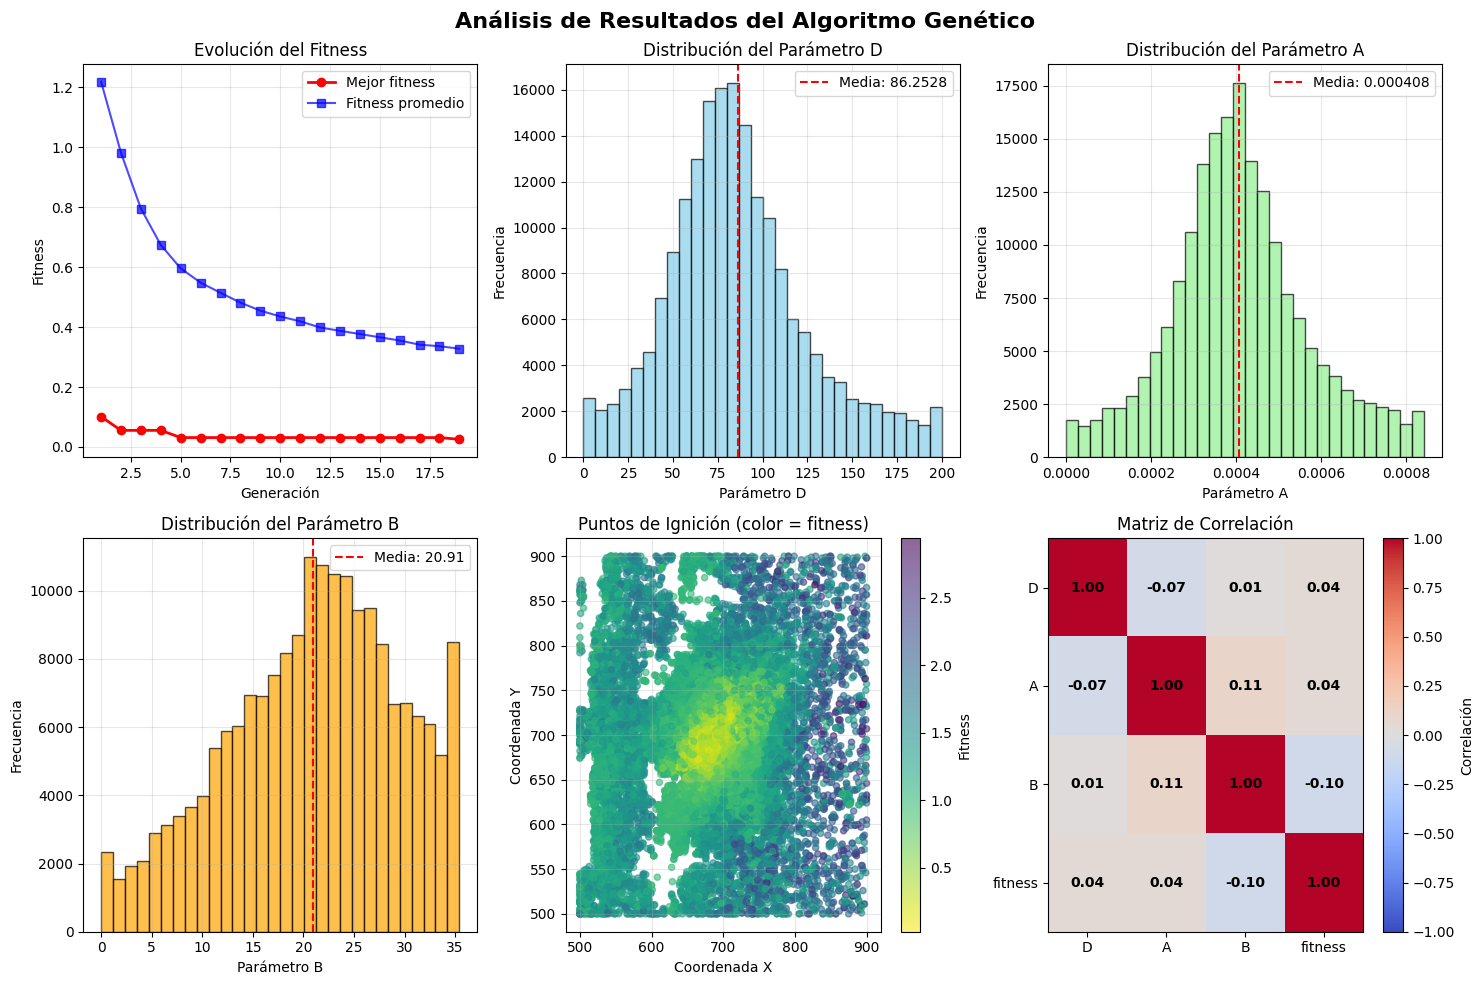


🏆 MEJOR INDIVIDUO ENCONTRADO:
   Generación: 19.0
   D = 52.015486
   A = 0.00049377
   B = 14.323197
   Punto de ignición: (701.0, 700.0)
   Fitness = 0.02526747


In [17]:
# Visualizaciones de los resultados del algoritmo genético
if 'datos_completos' in locals() and not datos_completos.empty:
    
    # Configurar el estilo de las gráficas
    plt.style.use('default')
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    fig.suptitle('Análisis de Resultados del Algoritmo Genético', fontsize=16, fontweight='bold')
    
    # 1. Evolución del fitness a lo largo de las generaciones
    mejor_fitness = datos_completos.groupby('generacion')['fitness'].min()
    fitness_promedio = datos_completos.groupby('generacion')['fitness'].mean()
    
    axes[0,0].plot(mejor_fitness.index, mejor_fitness.values, 'o-', color='red', linewidth=2, label='Mejor fitness')
    axes[0,0].plot(fitness_promedio.index, fitness_promedio.values, 's-', color='blue', alpha=0.7, label='Fitness promedio')
    axes[0,0].set_xlabel('Generación')
    axes[0,0].set_ylabel('Fitness')
    axes[0,0].set_title('Evolución del Fitness')
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)
    
    # 2. Distribución del parámetro D
    axes[0,1].hist(datos_completos['D'], bins=30, color='skyblue', alpha=0.7, edgecolor='black')
    axes[0,1].axvline(datos_completos['D'].mean(), color='red', linestyle='--', label=f'Media: {datos_completos["D"].mean():.4f}')
    axes[0,1].set_xlabel('Parámetro D')
    axes[0,1].set_ylabel('Frecuencia')
    axes[0,1].set_title('Distribución del Parámetro D')
    axes[0,1].legend()
    axes[0,1].grid(True, alpha=0.3)
    
    # 3. Distribución del parámetro A
    axes[0,2].hist(datos_completos['A'], bins=30, color='lightgreen', alpha=0.7, edgecolor='black')
    axes[0,2].axvline(datos_completos['A'].mean(), color='red', linestyle='--', label=f'Media: {datos_completos["A"].mean():.6f}')
    axes[0,2].set_xlabel('Parámetro A')
    axes[0,2].set_ylabel('Frecuencia')
    axes[0,2].set_title('Distribución del Parámetro A')
    axes[0,2].legend()
    axes[0,2].grid(True, alpha=0.3)
    
    # 4. Distribución del parámetro B
    axes[1,0].hist(datos_completos['B'], bins=30, color='orange', alpha=0.7, edgecolor='black')
    axes[1,0].axvline(datos_completos['B'].mean(), color='red', linestyle='--', label=f'Media: {datos_completos["B"].mean():.2f}')
    axes[1,0].set_xlabel('Parámetro B')
    axes[1,0].set_ylabel('Frecuencia')
    axes[1,0].set_title('Distribución del Parámetro B')
    axes[1,0].legend()
    axes[1,0].grid(True, alpha=0.3)
    
    # 5. Distribución de puntos de ignición (x, y)
    scatter = axes[1,1].scatter(datos_completos['x'], datos_completos['y'], 
                              c=datos_completos['fitness'], cmap='viridis_r', alpha=0.6, s=20)
    axes[1,1].set_xlabel('Coordenada X')
    axes[1,1].set_ylabel('Coordenada Y')
    axes[1,1].set_title('Puntos de Ignición (color = fitness)')
    plt.colorbar(scatter, ax=axes[1,1], label='Fitness')
    axes[1,1].grid(True, alpha=0.3)
    
    # 6. Correlación entre parámetros y fitness
    datos_numericos = datos_completos[['D', 'A', 'B', 'fitness']].corr()
    im = axes[1,2].imshow(datos_numericos, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
    axes[1,2].set_xticks(range(len(datos_numericos.columns)))
    axes[1,2].set_yticks(range(len(datos_numericos.columns)))
    axes[1,2].set_xticklabels(datos_numericos.columns)
    axes[1,2].set_yticklabels(datos_numericos.columns)
    axes[1,2].set_title('Matriz de Correlación')
    
    # Agregar valores de correlación
    for i in range(len(datos_numericos.columns)):
        for j in range(len(datos_numericos.columns)):
            text = axes[1,2].text(j, i, f'{datos_numericos.iloc[i, j]:.2f}',
                                ha="center", va="center", color="black", fontweight='bold')
    
    plt.colorbar(im, ax=axes[1,2], label='Correlación')
    
    plt.tight_layout()
    plt.show()
    
    # Mostrar el mejor individuo encontrado
    mejor_individuo = datos_completos.loc[datos_completos['fitness'].idxmin()]
    print(f"\n🏆 MEJOR INDIVIDUO ENCONTRADO:")
    print(f"   Generación: {mejor_individuo['generacion']}")
    print(f"   D = {mejor_individuo['D']:.6f}")
    print(f"   A = {mejor_individuo['A']:.8f}")
    print(f"   B = {mejor_individuo['B']:.6f}")
    print(f"   Punto de ignición: ({mejor_individuo['x']}, {mejor_individuo['y']})")
    print(f"   Fitness = {mejor_individuo['fitness']:.8f}")
    
else:
    print("⚠️ No hay datos para visualizar. Ejecuta la celda anterior primero.")

In [18]:
# Análisis estadístico detallado
if 'datos_completos' in locals() and not datos_completos.empty:
    
    print("📊 ESTADÍSTICAS DETALLADAS")
    print("=" * 50)
    
    # Estadísticas por parámetro
    parametros = ['D', 'A', 'B', 'fitness']
    
    for param in parametros:
        print(f"\n{param.upper()}:")
        print(f"  Media:         {datos_completos[param].mean():.8f}")
        print(f"  Mediana:       {datos_completos[param].median():.8f}")
        print(f"  Desv. Estándar: {datos_completos[param].std():.8f}")
        print(f"  Mínimo:        {datos_completos[param].min():.8f}")
        print(f"  Máximo:        {datos_completos[param].max():.8f}")
        print(f"  Rango:         {datos_completos[param].max() - datos_completos[param].min():.8f}")
    
    # Evolución de la diversidad
    print(f"\n📈 EVOLUCIÓN DE LA DIVERSIDAD:")
    print("-" * 30)
    
    diversidad_por_gen = datos_completos.groupby('generacion').agg({
        'D': 'std',
        'A': 'std', 
        'B': 'std',
        'fitness': ['min', 'mean', 'std']
    })
    
    for gen in sorted(datos_completos['generacion'].unique()):
        gen_data = datos_completos[datos_completos['generacion'] == gen]
        print(f"Generación {gen}:")
        print(f"  Diversidad D: {gen_data['D'].std():.6f}")
        print(f"  Diversidad A: {gen_data['A'].std():.8f}")
        print(f"  Diversidad B: {gen_data['B'].std():.6f}")
        print(f"  Mejor fitness: {gen_data['fitness'].min():.8f}")
        print(f"  Individuos: {len(gen_data)}")
    
    # Top 10 mejores individuos
    print(f"\n🏆 TOP 10 MEJORES INDIVIDUOS:")
    print("-" * 30)
    
    top_10 = datos_completos.nsmallest(10, 'fitness')[['generacion', 'D', 'A', 'B', 'x', 'y', 'fitness']]
    
    for idx, (_, individuo) in enumerate(top_10.iterrows(), 1):
        print(f"{idx:2d}. Gen {individuo['generacion']:2.0f} | "
              f"D={individuo['D']:.6f} | A={individuo['A']:.8f} | B={individuo['B']:.6f} | "
              f"({individuo['x']:3.0f},{individuo['y']:3.0f}) | fitness={individuo['fitness']:.8f}")
    
    # Convergencia del algoritmo
    print(f"\n📉 ANÁLISIS DE CONVERGENCIA:")
    print("-" * 30)
    
    mejores_por_gen = datos_completos.groupby('generacion')['fitness'].min()
    
    if len(mejores_por_gen) > 1:
        mejora_total = mejores_por_gen.iloc[0] - mejores_por_gen.iloc[-1]
        mejora_porcentual = (mejora_total / mejores_por_gen.iloc[0]) * 100
        
        print(f"Fitness inicial: {mejores_por_gen.iloc[0]:.8f}")
        print(f"Fitness final:   {mejores_por_gen.iloc[-1]:.8f}")
        print(f"Mejora total:    {mejora_total:.8f}")
        print(f"Mejora (%):      {mejora_porcentual:.2f}%")
        
        # Detectar estancamiento
        ultimas_5_gen = mejores_por_gen.tail(5)
        if len(ultimas_5_gen) >= 5:
            mejora_reciente = ultimas_5_gen.iloc[0] - ultimas_5_gen.iloc[-1]
            if abs(mejora_reciente) < 1e-6:
                print("⚠️  Posible estancamiento en las últimas 5 generaciones")
            else:
                print(f"✓  Mejora en últimas 5 gen: {mejora_reciente:.8f}")
    
else:
    print("⚠️ No hay datos para analizar. Ejecuta la celda de carga primero.")

📊 ESTADÍSTICAS DETALLADAS

D:
  Media:         86.25278669
  Mediana:       81.74915050
  Desv. Estándar: 39.54619934
  Mínimo:        0.00000000
  Máximo:        200.00000000
  Rango:         200.00000000

A:
  Media:         0.00040844
  Mediana:       0.00039867
  Desv. Estándar: 0.00016218
  Mínimo:        0.00000000
  Máximo:        0.00084332
  Rango:         0.00084332

B:
  Media:         20.90712782
  Mediana:       21.66275505
  Desv. Estándar: 8.48976785
  Mínimo:        0.00000000
  Máximo:        35.41497314
  Rango:         35.41497314

FITNESS:
  Media:         0.52691776
  Mediana:       0.42920555
  Desv. Estándar: 0.34020601
  Mínimo:        0.02526747
  Máximo:        2.93905076
  Rango:         2.91378329

📈 EVOLUCIÓN DE LA DIVERSIDAD:
------------------------------
Generación 1:
  Diversidad D: 58.425290
  Diversidad A: 0.00024516
  Diversidad B: 10.214974
  Mejor fitness: 0.10112679
  Individuos: 10000
Generación 2:
  Diversidad D: 58.256620
  Diversidad A: 0.0002